# GRIP : The Sparks Foundation


# <font color =" green">Object : Predicting the Score if a Student Study 9.25hrs/day.<br>
 <font color = "pink">By Hemant Goyal intern at The Spark Foundaton

In [72]:
# Load some Compulsary Pakcages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [73]:
# loading the input data
df = pd.read_csv(r"C:\Users\user\Downloads\Spark Foundation\StudentStudy.csv")

In [74]:
# Show 1st 5 values
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [75]:
# define the datatype of column value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [76]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Scores')

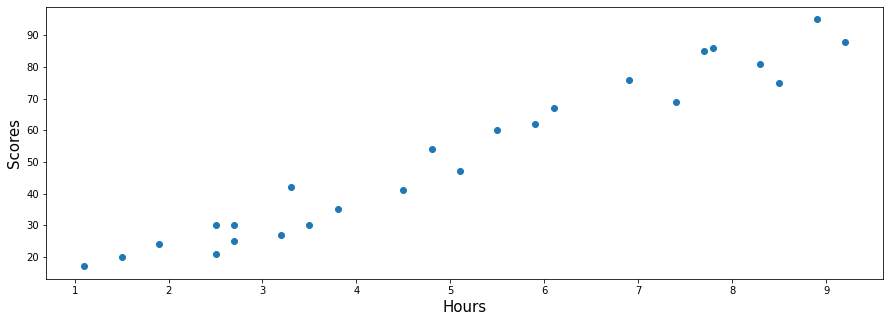

In [77]:
plt.figure(figsize=(15,5))
plt.scatter( "Hours","Scores", data=df)
plt.xlabel("Hours", fontsize=15)
plt.ylabel("Scores", fontsize=15)

In [78]:
# find sum of all num values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

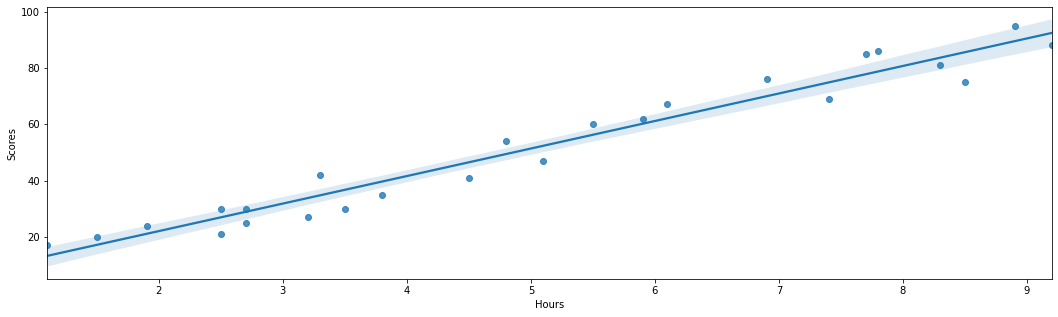

In [79]:
plt.figure(figsize=(18,5))
sns.regplot(x ="Hours", y="Scores", data=df )

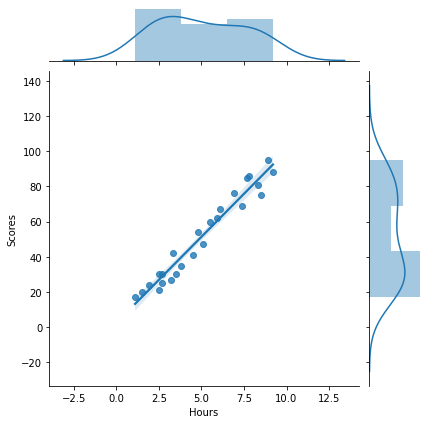

In [121]:

sns.jointplot(df["Hours"], df["Scores"], kind="reg")

# Insights : 
here we can say there is strong positive relationship between variables. 

In [80]:
# corelation of data
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [81]:
#devide the data
X = df[["Hours"]]   #input data
y = df[["Scores"]]  # output data

# <font color = "firebrick">    OLS Model
Object : reduce the error and find the best fit line.

In [82]:
#package that have regression model
import statsmodels.api as sm

In [84]:
X_1 = sm.add_constant(X)  
lm = sm.OLS(y,X_1)         #create function
lm = lm.fit()              #iterating the model and get best fit line.

In [85]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Fri, 02 Jul 2021   Prob (F-statistic):           9.13e-17
Time:                        20:20:10   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# <font color ="green"> to test the model we need to divide the data into train and test.

In [90]:
# to split the data
from sklearn.model_selection import train_test_split

In [100]:
#split the data into train 80% and will test 20% of data
# random state fix 80% train and 20% of the test data.
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.8, random_state = 15)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((20, 1), (20, 1), (5, 1), (5, 1))

# train the Model and fit

In [102]:
#adding intercept
X_train_1 = sm.add_constant(X_train)  
lm = sm.OLS(y_train,X_train_1)         #create function
lm = lm.fit()

In [103]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     373.1
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           1.75e-13
Time:                        00:30:44   Log-Likelihood:                -62.060
No. Observations:                  20   AIC:                             128.1
Df Residuals:                      18   BIC:                             130.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0735      2.880      1.067      0.300      -2.977       9.123
Hours          9.8377      0.509     19.317      0.000       8.768      10.908
==============================================================================
Omnibus:                        2.712   Durbin-Watson:                   2.398
Prob(Omnibus):                  0.258   Jarque-Bera (JB):                1.983
Skew:                          -0.611   Prob(JB):                        0.371
Kurtosis:                       2.058   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# test the Model

In [104]:
X_test_1 = sm.add_constant(X_test)  # for test data add intercept
y_pred_test = lm.predict(X_test_1)        #predicting the salary for the test data
y_pred_test

16    27.667819
22    40.456881
2     34.554237
1     53.245944
6     93.580678
dtype: float64

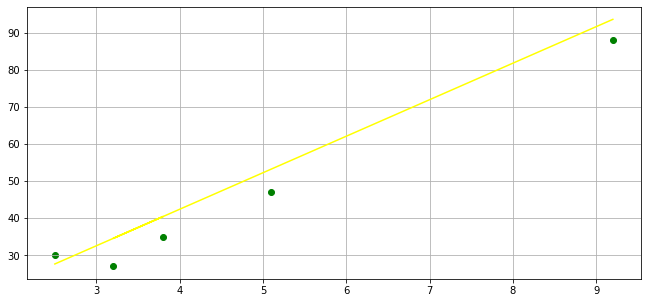

In [105]:
# plot actual and predicted data. here only y_pred will change nothing else.
plt.figure(figsize=(11,5))
plt.scatter(X_test, y_test, color="green")
plt.plot(X_test,y_pred_test, color = "Yellow")
plt.grid()

In [106]:
testing_data = X_test
testing_data["Actual_Score"] = y_test
testing_data["Prediction_Score"] = y_pred_test
testing_data["Error"] = testing_data["Actual_Score"] - testing_data["Prediction_Score"]
testing_data

,Hours,Actual_Score,Prediction_Score,Error
16,2.5,30,27.667819,2.332181
22,3.8,35,40.456881,-5.456881
2,3.2,27,34.554237,-7.554237
1,5.1,47,53.245944,-6.245944
6,9.2,88,93.580678,-5.580678


In [107]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

In [109]:
mse = mean_squared_error(testing_data["Actual_Score"],testing_data["Prediction_Score"])
R2 = r2_score(testing_data["Actual_Score"],testing_data["Prediction_Score"])
mse, R2

(32.48777954335221, 0.9350556142184707)

# <font color = "green"> Result : 
    train and test data  r2 value is similar to eachother.       
    so our model is fitting really well.

In [110]:
rmse = np.sqrt(mse)
rmse

5.699805219773059

# <font color = "green"> If a Student Study 9.25 hrs then Score?
    

In [115]:
constant = 1.98
Coff =  9.83
hrs = 9.25

In [116]:
Scores = constant + Coff*hrs
Scores

92.9075